In [1131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# IDK what to put here

##Reference

https://www.who.int/data/gho/indicator-metadata-registry/imr-details/1157#:~:text=Definition%3A,%2C%20territory%2C%20or%20geographic%20area.

Mortality rate - The estimated total number of deaths in a population divided by the total number of this population

https://www.emro.who.int/health-topics/disease-outbreaks/index.html

https://www.dir.ca.gov/covid/employer/covid-outbreaks.html#:~:text=Major%20outbreak%20-%2020%20or%20more,within%20a%2030-day%20period.

A disease outbreak is the occurrence of cases of disease in excess of what would normally be expected in a defined community, geographical area or season.

https://www.youtube.com/watch?v=aMc-XJQ-C6M&t=34s

Outbreak: Sudden rise of a disease in a particular place

Epidemic: OUTBREAK over larger geographical area

Pandemic: EPIDEMIC spreads from multiple countries

##Discussion


For our question regarding the relationship between outbreak declaration and mortality rate and the terms, the rate does not support enough for the outbreak declaration, but instead it supposes to find the unexpected increase rate of change of Infected compartment.

However, our question also have some flaw that in the real life case senario, mortality rate only supports for those who die due to the diseases. So getting their total death values at early stage is going to be tricky and not efficient since our objective is to optimize the population as best as possible.

Since our focus are on 3rd world countries, it should be remind that the outbreak change to the epidemic for better usage of terms

Modifying our questions into a few parts:

1. When to declare epidemic from infectious rate? (dI/dt)

2. Can mortality rate declare an epidemic? (dD/dt)

3. Should we consider exposed rate to declare an epidemic?(dE/dt)

For the first question.

How?

> Assume dI/dt = a at t = k as k is the day of the expected epidemic declared from the rate of change of infected people

> Assume dI/dt = b at t = k - ^t, where ^t is integer and the difference of t from k

> Note that k, ^t > 0 and k > ^t


All we need is this:

> 0 < a - b < T, 
  where T is a threshold of the change in the infectious people so its going to be an input

> We need to find k - 1 when the first (a-b) >= T

> Let T = 2 and ^t = 1

daydE = []
limitE = 2
timeE = 14

For the second question,

Fairly similar with the first questions but as stated before, really late to get the data and need some changes

BUT FOR THE SAKE OF THE EXPERIMENT


> We need to find where 0 < a < T

> We're going to let T = 3

For the third question,

> Assume dE/dt = a at t = k as k is the day of the expected epidemic declared from the rate of change in death

> We need to find where 0 < a < T

> We're going to let T = 3 and ^t = 7

There are some important details that need to be considered:

- This calculation requires to check it is before the day of the maximum value of I and D so it is not too late if we try to prevent the disease



# Function

In [1132]:
# Total population, N.
N0 = 100000
# Initial number of infected and recovered individuals, I0 and R0
E0, R0, D0, M0, I0 = 1, 0, 0, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N0 - I0 - R0 - D0 - M0 - E0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days)
beta, gamma, delta, sigma = 0.5, 0.2, 0.1, 0.25
# A grid of time points (in days)
max_day = 365.005
t = np.arange(0, max_day,0.005)


i = 0.01
changeD = []
while(i < 0.25):
  changeD.append(i)
  i = i + 0.005

# Initial conditions vector including N
y0 = M0, S0, E0, I0, R0, D0

print(len(t))
print(len(changeD))
print(changeD)

73001
48
[0.01, 0.015, 0.02, 0.025, 0.030000000000000002, 0.035, 0.04, 0.045, 0.049999999999999996, 0.05499999999999999, 0.05999999999999999, 0.06499999999999999, 0.06999999999999999, 0.075, 0.08, 0.085, 0.09000000000000001, 0.09500000000000001, 0.10000000000000002, 0.10500000000000002, 0.11000000000000003, 0.11500000000000003, 0.12000000000000004, 0.12500000000000003, 0.13000000000000003, 0.13500000000000004, 0.14000000000000004, 0.14500000000000005, 0.15000000000000005, 0.15500000000000005, 0.16000000000000006, 0.16500000000000006, 0.17000000000000007, 0.17500000000000007, 0.18000000000000008, 0.18500000000000008, 0.19000000000000009, 0.1950000000000001, 0.2000000000000001, 0.2050000000000001, 0.2100000000000001, 0.2150000000000001, 0.2200000000000001, 0.22500000000000012, 0.23000000000000012, 0.23500000000000013, 0.24000000000000013, 0.24500000000000013]


# Calculation

In [1133]:
def generate(deathrate,birthrate):

    def deriv(y, t):
        M, S, E, I, R, D = y

        N = M + S + E + I + R + D
        p = R / N

        dMdt = -delta * M + birthrate * I * p
        dSdt = -(beta * S * I) / N + delta * M + birthrate * I * (1 - p) + delta * R - delta * S * M / N
        dEdt = (beta * S * I) / N - sigma * E
        dIdt = sigma * E - (gamma + deathrate) * I
        dRdt = gamma * I - delta * R
        dDdt = deathrate * I

        return [dMdt, dSdt, dEdt, dIdt, dRdt, dDdt]

    # Initial conditions vector
    y0 = M0, S0, E0, I0, R0, D0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t)
    M, S, E, I, R, D = ret.T
    N = N0 - D


    table = pd.DataFrame(
        {
            "Times": t,
            "Population": N,
            "Exposed": E,
            "Infected": I,
            "Recovered": R,
            "Death": D
        }
    )

    dEdt_col = []
    dIdt_col = []
    dDdt_col = []

    dEdt_sec = []
    dIdt_sec = []
    dDdt_sec = []

    for i in range(len(t)):
        mat = M[i]
        sus = S[i]
        ex = E[i]
        inf = I[i]
        rec = R[i]
        dea = D[i]
        pop = N0 - dea
        input = [mat, sus, ex, inf, rec, dea] 
        dMdt, dSdt, dEdt, dIdt, dRdt, dDdt = deriv(input, t[i])

        dD_sec = deathrate * dIdt
        dI_sec = sigma * dEdt - (gamma + deathrate) * dIdt
        dE_sec = (sus * dIdt + inf * dSdt)/pop + (sus*inf/(pop*pop)) * dDdt

        dEdt_col.append(dEdt)
        dIdt_col.append(dIdt)
        dDdt_col.append(dDdt)

        dEdt_sec.append(dE_sec)
        dIdt_sec.append(dI_sec)
        dDdt_sec.append(dD_sec)

    table['dE/dt'] = dEdt_col
    table['dI/dt'] = dIdt_col
    table['dD/dt'] = dDdt_col

    table['dE/dt_sec'] = dEdt_sec
    table['dI/dt_sec'] = dIdt_sec
    table['dD/dt_sec'] = dDdt_sec

    return table

In [1134]:
eq = []

for k in changeD:
    test = generate(k,0.1)
    eq.append(test)

#Visualisation

###Second derivative

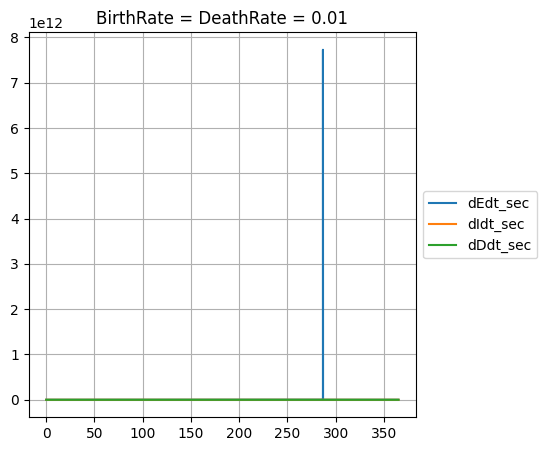

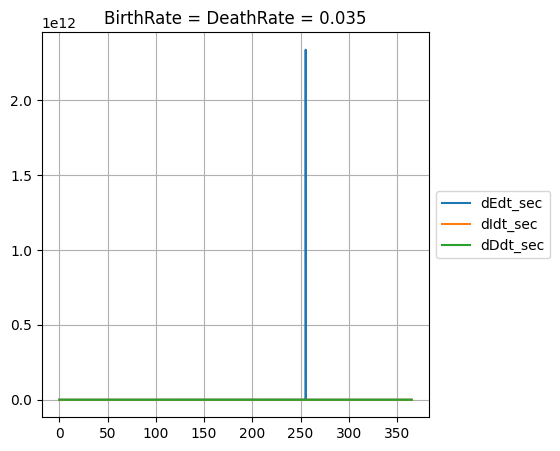

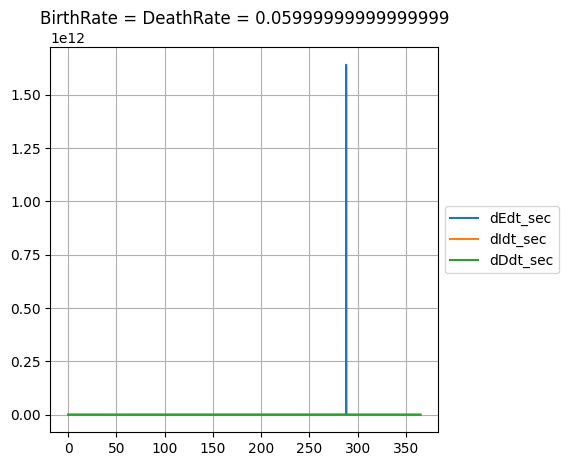

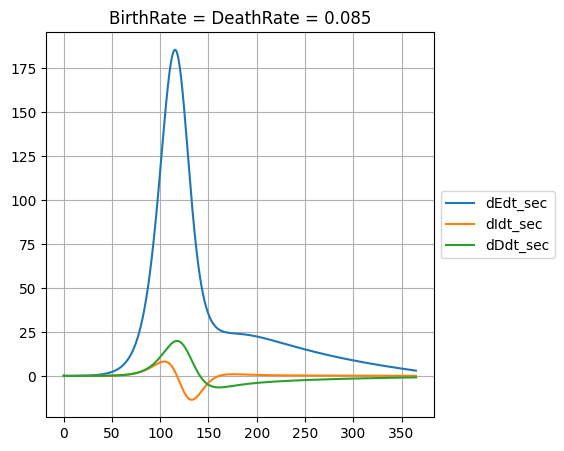

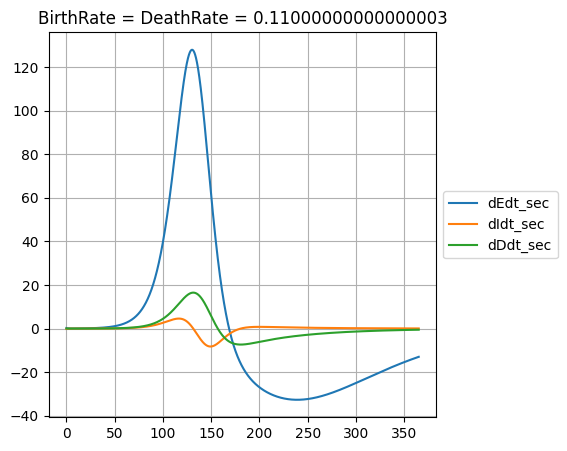

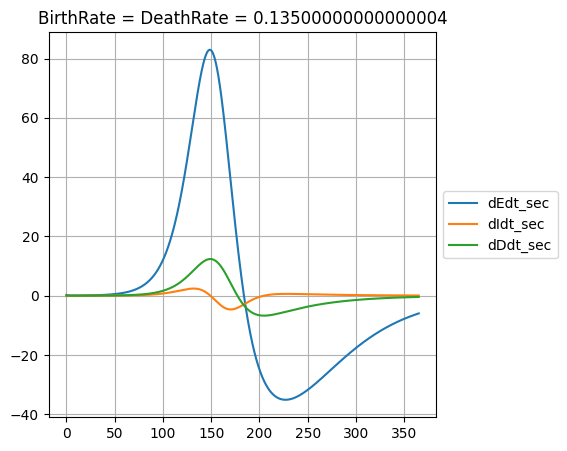

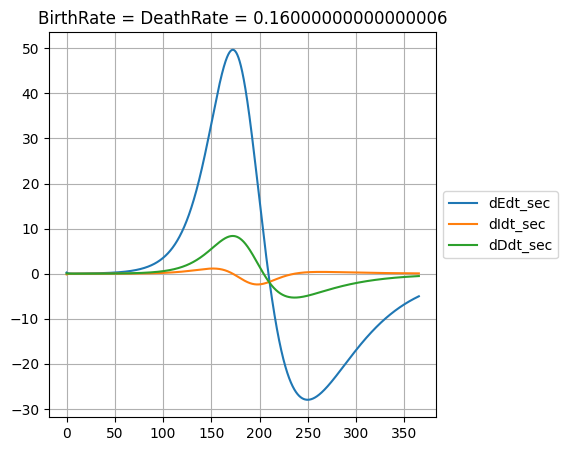

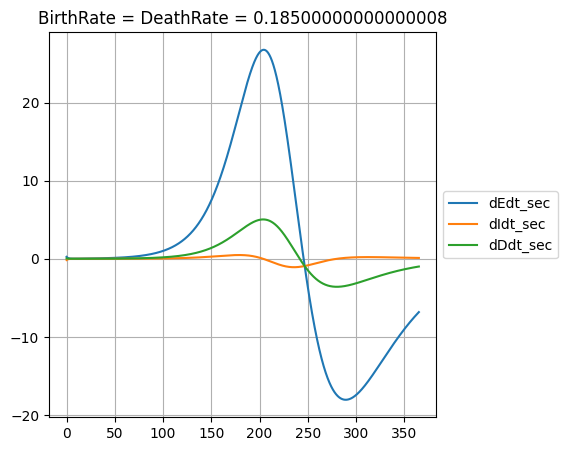

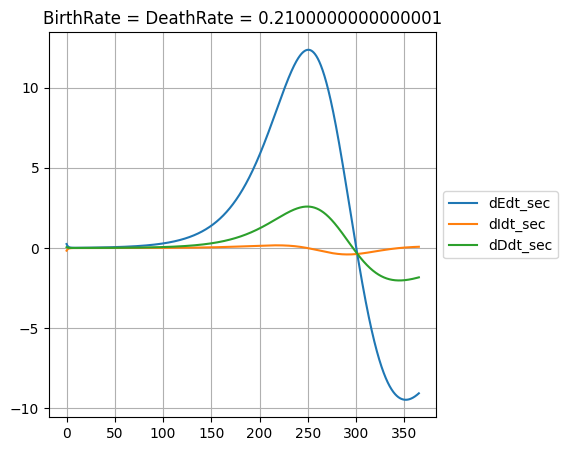

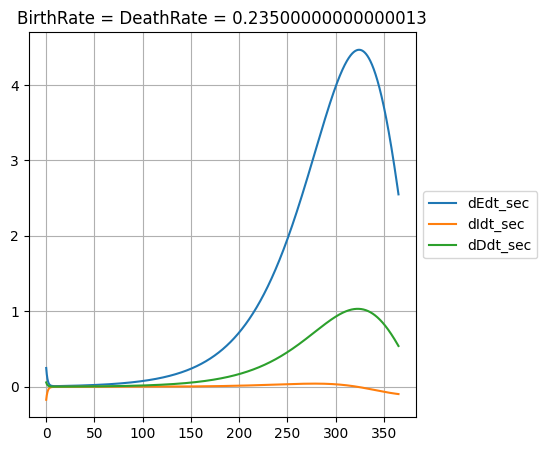

In [1135]:
for i in range(len(eq)):
  i = i * 5
  if(i >= len(eq)):
    break
  plt.figure(figsize = (5,5))
  plt.plot(eq[i]['Times'],eq[i]['dE/dt_sec'],label = 'dEdt_sec')
  plt.plot(eq[i]['Times'],eq[i]['dI/dt_sec'],label = 'dIdt_sec')
  plt.plot(eq[i]['Times'],eq[i]['dD/dt_sec'],label = 'dDdt_sec')
  plt.title("BirthRate = DeathRate = " + str(changeD[i]))
  plt.grid(True)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### First Derivative

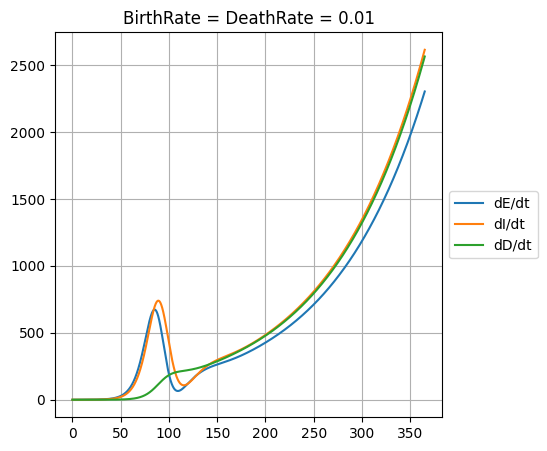

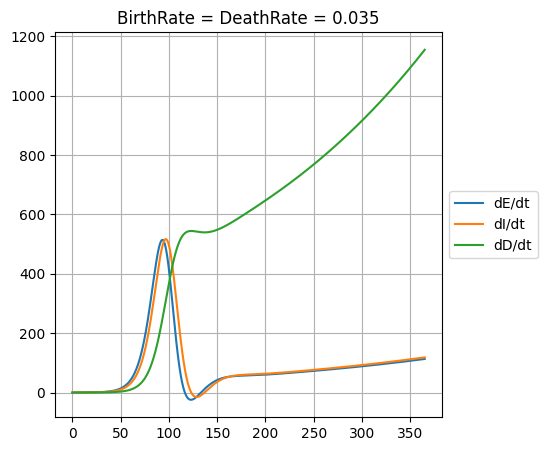

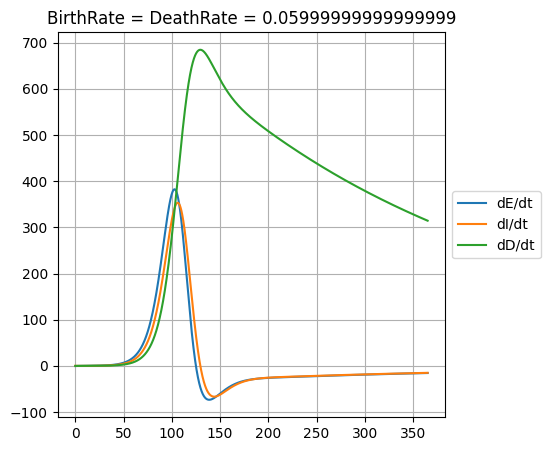

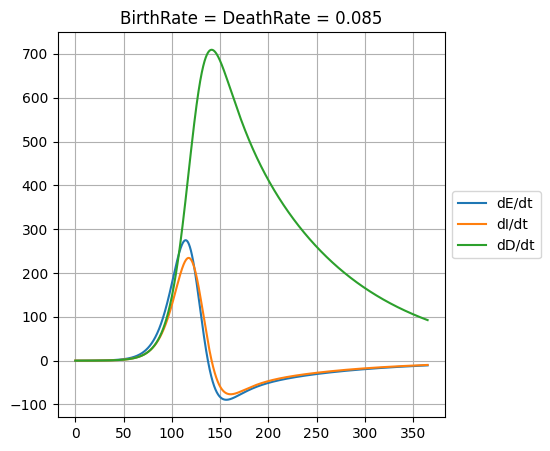

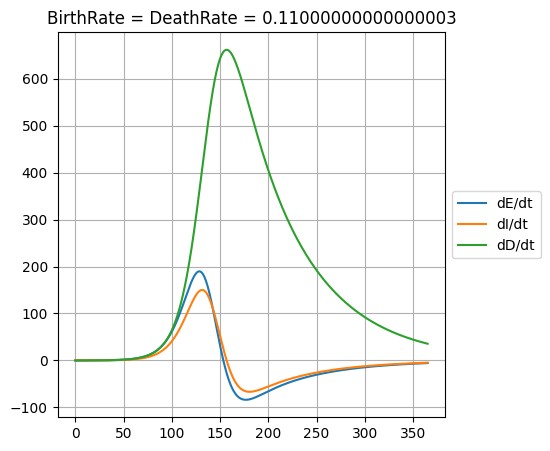

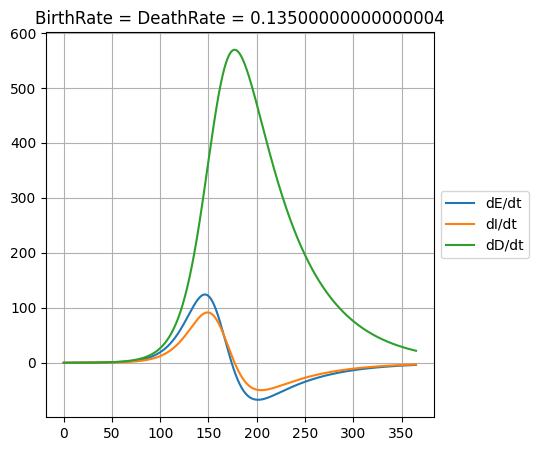

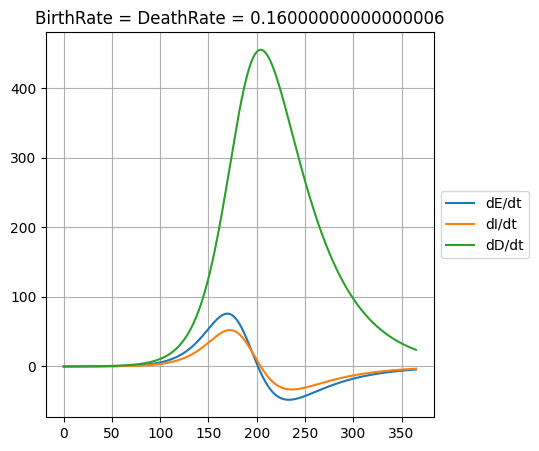

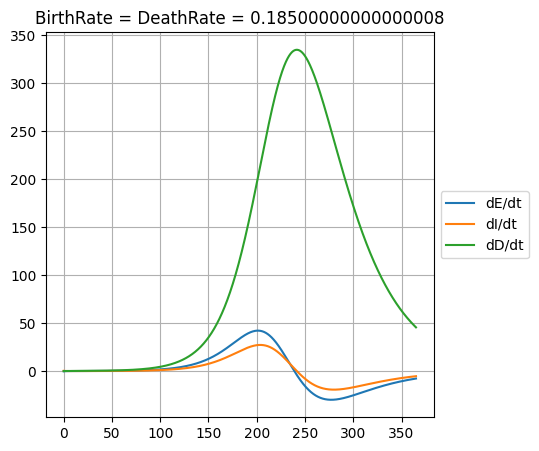

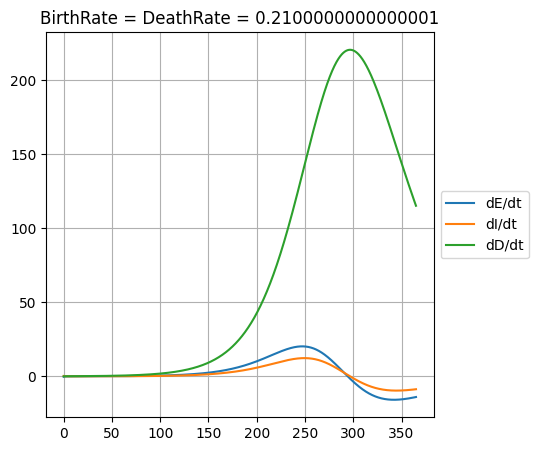

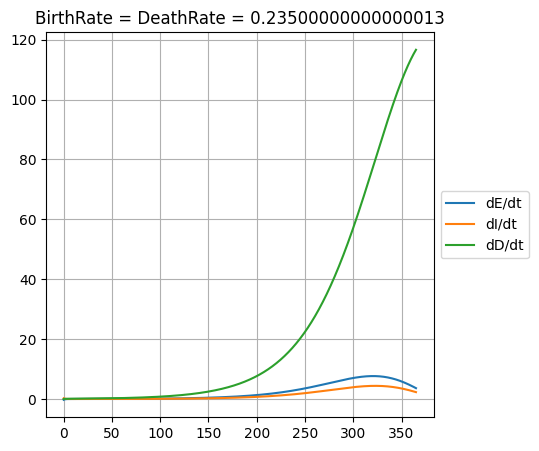

In [1136]:
for i in range(len(eq)):
  i = i * 5
  if(i >= len(eq) or i >= len(changeD)):
    break  
  plt.figure(figsize = (5,5))
  plt.plot(eq[i]['Times'],eq[i]['dE/dt'],label = 'dE/dt')
  plt.plot(eq[i]['Times'],eq[i]['dI/dt'],label = 'dI/dt')
  plt.plot(eq[i]['Times'],eq[i]['dD/dt'],label = 'dD/dt')
  plt.title("BirthRate = DeathRate = " + str(changeD[i]))
  plt.grid(True)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Usual

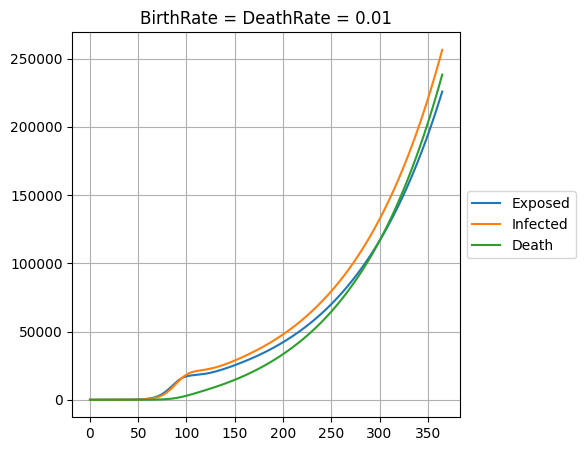

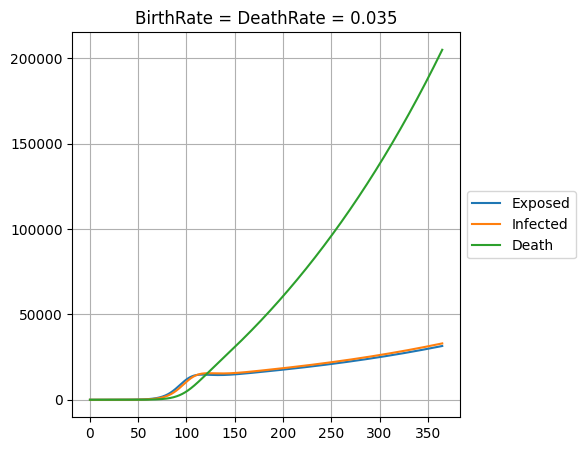

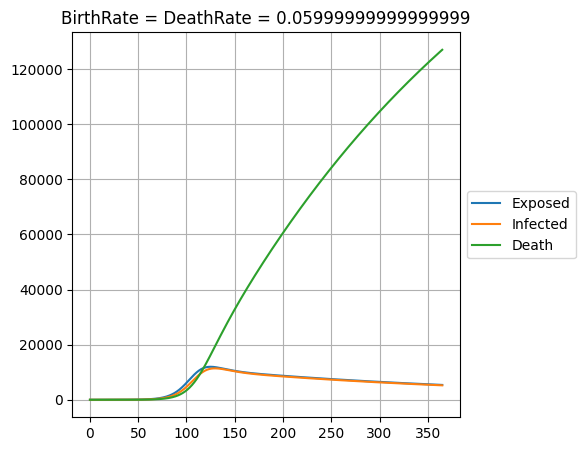

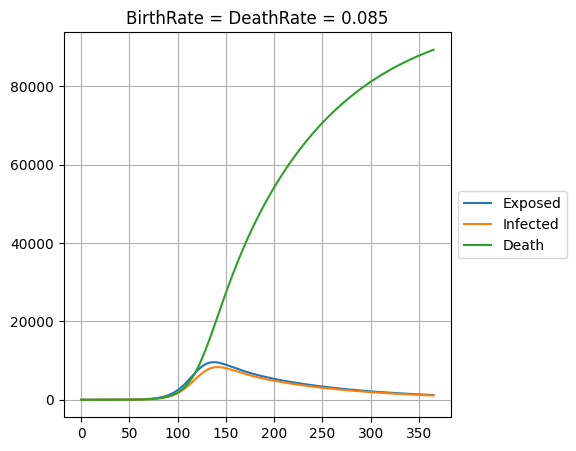

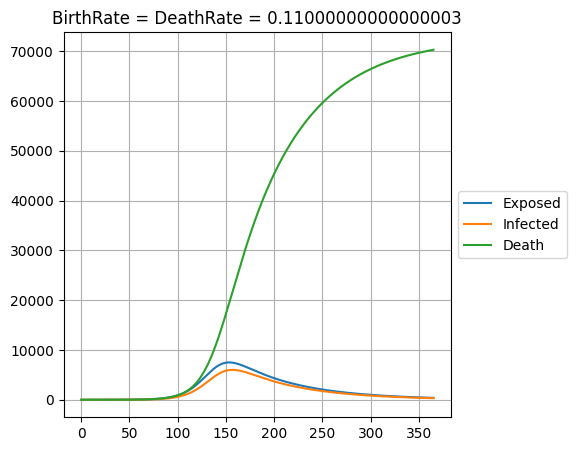

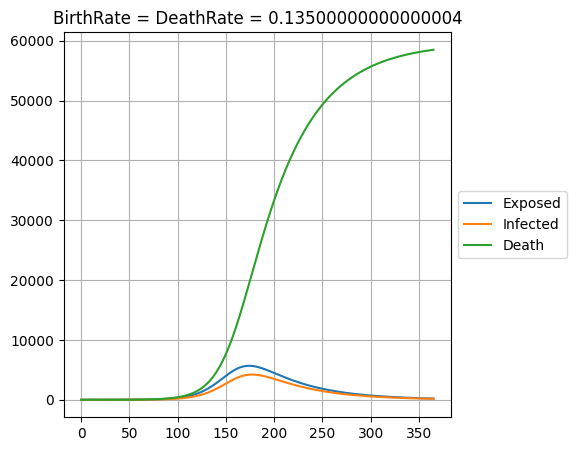

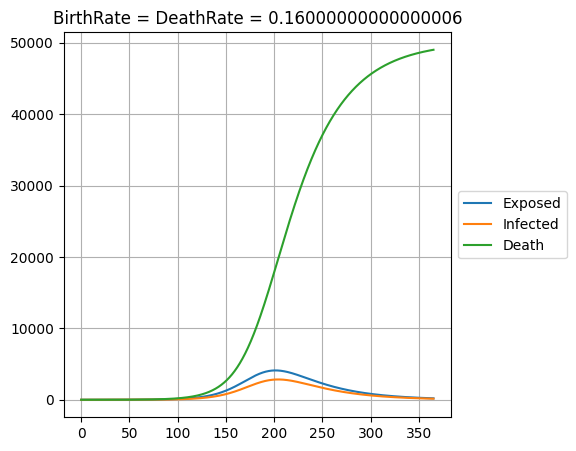

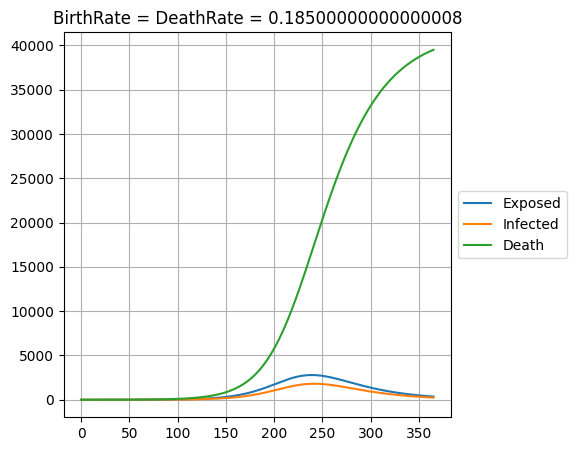

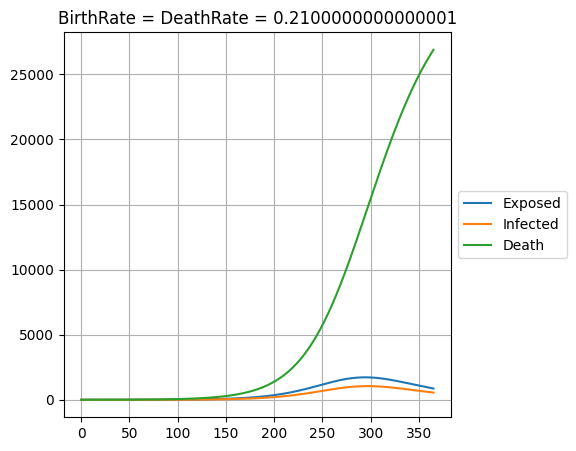

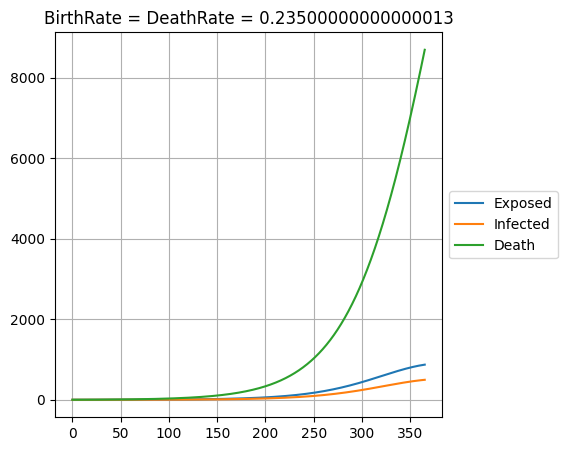

In [1137]:
for i in range(len(eq)):
  i = i * 5
  if(i >= len(eq)):
    break  
  plt.figure(figsize = (5,5))
  plt.plot(eq[i]['Times'],eq[i]['Exposed'],label = 'Exposed')
  plt.plot(eq[i]['Times'],eq[i]['Infected'],label = 'Infected')
  plt.plot(eq[i]['Times'],eq[i]['Death'],label = 'Death')
  plt.title("BirthRate = DeathRate = " + str(changeD[i]))
  plt.grid(True)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Result (Equal & Second derivative)

In [1138]:
result = pd.DataFrame()

result['Death Rate'] = changeD
mortality = []
max = []
maxTime = []

for i in eq:
  midpop = i['Population'][int((len(t) - 1)/2)]
  max_death_index = i['Death'].idxmax()
  death = i.loc[max_death_index, 'Death']
  rate = death/midpop
  mortality.append(rate)
  max.append(death)
  time_at_max_death = i.loc[max_death_index, 'Times']
  maxTime.append(time_at_max_death)

result['Mortality Rate'] = mortality
result['Max Death'] = max

In [1139]:
result

,Death Rate,Mortality Rate,Max Death
0,0.010,3.207977,238312.244365
1,0.015,3.962444,261749.661607
2,0.020,4.324744,259447.441579
3,0.025,4.404381,244862.329486
4,0.030,4.293879,225381.824597
5,0.035,4.067437,204920.685844
6,0.040,3.780745,185428.426494
7,0.045,3.472551,167762.300049
8,0.050,3.167584,152190.140242
9,0.055,2.879995,138677.373119


##Coding

In [1140]:
daydE = []
limit = 2
time = 1
check = 'dE/dt_sec'

for k in eq:
  input = np.nan
  for i in range(time,len(t)):
    initial = k[check][i - time]
    final = k[check][i]
    if(((final) >= limit) and (final > 0)):
      input = k['Times'][i]
      break
  daydE.append(input)

print(daydE)

[30.805, 31.645, 32.525, 33.44, 34.395, 35.39, 36.435, 37.525, 38.665, 39.86, 41.115, 42.43, 43.815, 45.27, 46.800000000000004, 48.410000000000004, 50.115, 51.910000000000004, 53.81, 55.82, 57.955, 60.22, 62.625, 65.19, 67.93, 70.855, 73.985, 77.35000000000001, 80.965, 84.865, 89.08, 93.65, 98.61500000000001, 104.035, 109.965, 116.485, 123.675, 131.655, 140.55, 150.525, 161.79, 174.62, 189.365, 206.51, 226.745, 251.1, 281.33, 321.12]


In [1141]:
daydI = []
limit = 2
time = 1
check = 'dI/dt_sec'

for k in eq:
  input = np.nan
  for i in range(time,len(t)):
    final = k[check][i]
    if(((final) >= limit) &  (final > 0)):
      input = k['Times'][i]
      break
  daydI.append(input)

print(daydI)

[47.77, 49.17, 50.635, 52.160000000000004, 53.76, 55.435, 57.195, 59.035000000000004, 60.97, 63.0, 65.14, 67.395, 69.775, 72.29, 74.955, 77.78, 80.785, 83.99, 87.41, 91.08500000000001, 95.04, 99.325, 104.0, 109.16, 114.95, 121.7, 130.615, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [1142]:
daydD = []
limit = 2
time = 1
check = 'dD/dt_sec'
index = []

for k in eq:
  input = np.nan
  ind = 0
  for i in range(time,len(t)):
    final = k[check][i]
    if(((final) >= limit) &  (final > 0)):
      input = k['Times'][i]
      ind = i
      break
  index.append(ind)
  daydD.append(input)

print(index)
print(daydD)

[13811, 13403, 13214, 13143, 13146, 13203, 13303, 13437, 13602, 13795, 14014, 14258, 14526, 14819, 15136, 15479, 15849, 16246, 16673, 17130, 17621, 18147, 18711, 19317, 19968, 20668, 21423, 22237, 23118, 24074, 25113, 26245, 27485, 28848, 30352, 32023, 33892, 35999, 38406, 41203, 44554, 48900, 0, 0, 0, 0, 0, 0]
[69.055, 67.015, 66.07000000000001, 65.715, 65.73, 66.015, 66.515, 67.185, 68.01, 68.97500000000001, 70.07000000000001, 71.29, 72.63, 74.095, 75.68, 77.395, 79.245, 81.23, 83.365, 85.65, 88.105, 90.735, 93.555, 96.58500000000001, 99.84, 103.34, 107.11500000000001, 111.185, 115.59, 120.37, 125.565, 131.225, 137.425, 144.24, 151.76, 160.115, 169.46, 179.995, 192.03, 206.01500000000001, 222.77, 244.5, nan, nan, nan, nan, nan, nan]


In [1143]:
result['Outbreak dE_S'] = daydE
result['Outbreak dI_S'] = daydI
result['Outbreak dD_S'] = daydD

result['OutBDay_D2'] = result[["Outbreak dE_S","Outbreak dI_S","Outbreak dD_S"]].min(axis = 1)
Max_Death = []
EstOutBDay_Death = []


for i in range(len(result['OutBDay_D2'])):
    df = eq[i]
    death = np.nan
    for j in range(len(df)):
        if result['OutBDay_D2'][i] == df['Times'].values[j]:
            death = df['Death'].values[j]
            break
    EstOutBDay_Death.append(death)


result['OutBDay_D2'].fillna(0, inplace = True)

result['EstOutBDay_Death'] = EstOutBDay_Death
result['PercentageD2'] = (result['EstOutBDay_Death'])/result['Max Death'] * 100

#Result All

In [1144]:
result

,Death Rate,Mortality Rate,Max Death,Outbreak dE_S,Outbreak dI_S,Outbreak dD_S,OutBDay_D2,EstOutBDay_Death,PercentageD2
0,0.010,3.207977,238312.244365,30.805,47.770,69.055,30.805,1.266612,0.000531
1,0.015,3.962444,261749.661607,31.645,49.170,67.015,31.645,1.984249,0.000758
2,0.020,4.324744,259447.441579,32.525,50.635,66.070,32.525,2.766358,0.001066
3,0.025,4.404381,244862.329486,33.440,52.160,65.715,33.440,3.616850,0.001477
4,0.030,4.293879,225381.824597,34.395,53.760,65.730,34.395,4.542775,0.002016
5,0.035,4.067437,204920.685844,35.390,55.435,66.015,35.390,5.549639,0.002708
6,0.040,3.780745,185428.426494,36.435,57.195,66.515,36.435,6.649907,0.003586
7,0.045,3.472551,167762.300049,37.525,59.035,67.185,37.525,7.847194,0.004678
8,0.050,3.167584,152190.140242,38.665,60.970,68.010,38.665,9.151997,0.006014
9,0.055,2.879995,138677.373119,39.860,63.000,68.975,39.860,10.576469,0.007627


Text(0.5, 0, 'EstOutBDay')

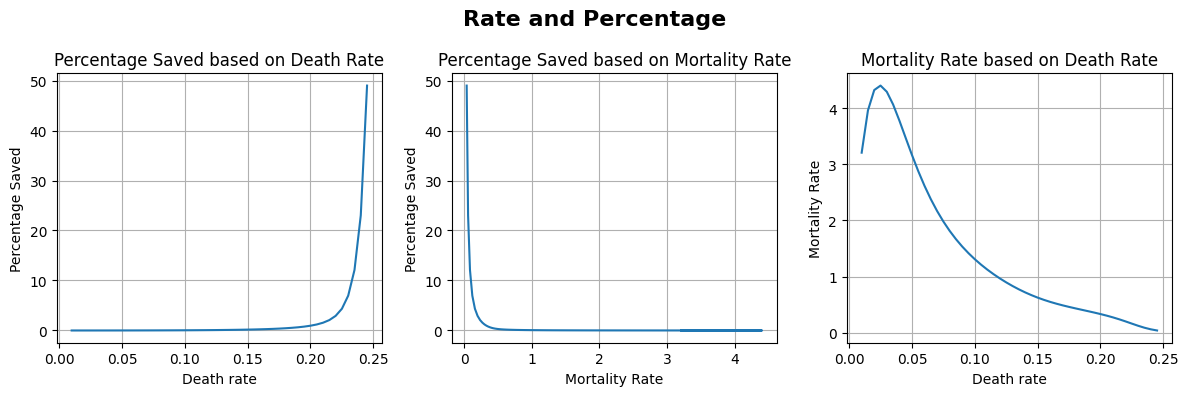

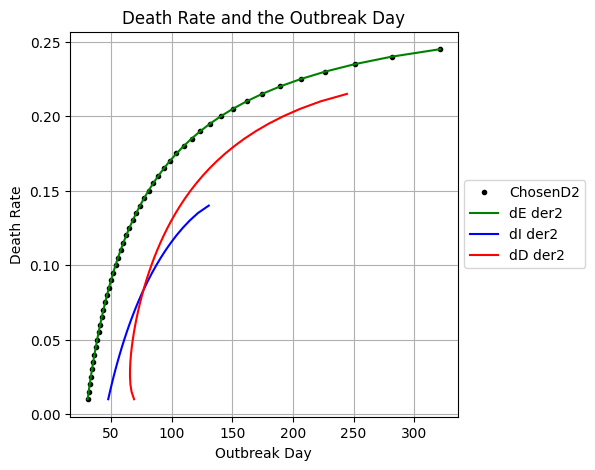

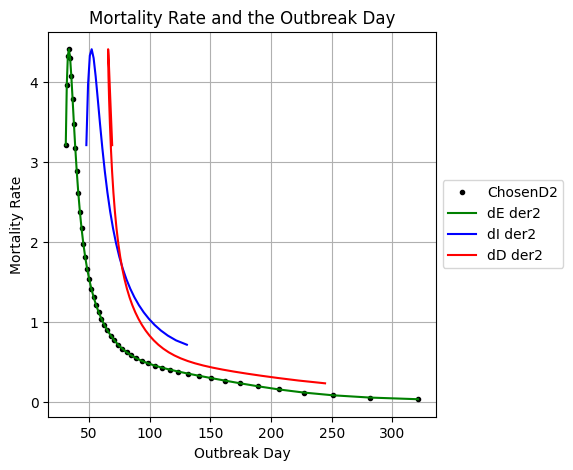

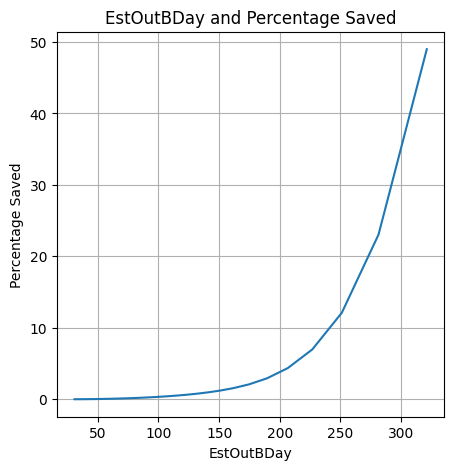

In [1145]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Rate and Percentage', fontsize=16, fontweight='bold')

axs[0].plot(result['Death Rate'], result['PercentageD2'])
axs[0].set_xlabel("Death rate")
axs[0].set_ylabel("Percentage Saved")
axs[0].set_title("Percentage Saved based on Death Rate")
axs[0].grid(True)

axs[1].plot(result['Mortality Rate'], result['PercentageD2'])
axs[1].set_xlabel("Mortality Rate")
axs[1].set_ylabel("Percentage Saved")
axs[1].set_title("Percentage Saved based on Mortality Rate")
axs[1].grid(True)


axs[2].plot(result['Death Rate'], result['Mortality Rate'])
axs[2].set_xlabel("Death rate")
axs[2].set_ylabel("Mortality Rate")
axs[2].set_title("Mortality Rate based on Death Rate")
axs[2].grid(True)

plt.tight_layout()

plt.figure(figsize = (5,5))
plt.title("Death Rate and the Outbreak Day")
plt.xlabel("Outbreak Day")
plt.ylabel("Death Rate")
plt.plot(result['OutBDay_D2'],result['Death Rate'],'k.', label = 'ChosenD2')
plt.plot(result['Outbreak dE_S'],result['Death Rate'],'g-', label = 'dE der2')
plt.plot(result['Outbreak dI_S'],result['Death Rate'],'b-', label = 'dI der2')
plt.plot(result['Outbreak dD_S'],result['Death Rate'],'r-', label = 'dD der2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.figure(figsize = (5,5))
plt.title("Mortality Rate and the Outbreak Day")
plt.xlabel("Outbreak Day")
plt.ylabel("Mortality Rate")
plt.plot(result['OutBDay_D2'],result['Mortality Rate'],'k.', label = 'ChosenD2')
plt.plot(result['Outbreak dE_S'],result['Mortality Rate'],'g-', label = 'dE der2')
plt.plot(result['Outbreak dI_S'],result['Mortality Rate'],'b-', label = 'dI der2')
plt.plot(result['Outbreak dD_S'],result['Mortality Rate'],'r-', label = 'dD der2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.figure(figsize = (5,5))
plt.plot(result['OutBDay_D2'],result['PercentageD2'])
plt.grid(True)
plt.title("EstOutBDay and Percentage Saved")
plt.ylabel("Percentage Saved")
plt.xlabel("EstOutBDay")
